# WeRateDogs Data Wrangling Project



# Table of Contents
- [Data Gathering](#DG)
- [Assessing Data](#AD)
- [Cleaning Data](#CD)
- [Analyzing Data](#AND)


In [2]:
#Import Packages
import pandas as pd
import numpy as np
import os
import requests
import io
import json
import time
import tweepy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set (style = "darkgrid")

from scipy import stats

<a id='DG'></a>
## Data Gathering

- [1. Enhanced Twitter Archive](#ETA)

- [2. Image prediction](#EP)

- [3. JSON Data](#JD)

<a id='ETA'></a>
**1. Enhanced Twitter Archive**

In [3]:
# load the enhanced twitter archive file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
#tweet id for accessing API
tweet_id_ =list(twitter_archive['tweet_id'])

<a id='EP'></a>
**2. Image Predictions File**

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network



In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_prediction.tsv' , mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_prediction.tsv', delimiter ='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='JD'></a>
**3. JSON Data**

In [6]:
# Autontification to twetter API

# Generate your own at https://apps.twitter.com/app
# CONSUMER_KEY = 'Consumer Key (API key)'
# CONSUMER_SECRET = 'Consumer Secret (API Secret)'
# OAUTH_TOKEN = 'Access Token'
# OAUTH_TOKEN_SECRET = 'Access Token Secret'

consumer_key = 'qhSwqxpKslaBZofulQi598DrI'
consumer_secret = 'UTdmFpZb24IHcGc8CAaxArwq6LfyVMgUZz1gSuJuHyu7lj7hD0'
access_token = '793618519-K9kFIsgzD9vhp14kD5GxOLnGFEGl3jnjVZnwcMh5'
access_token_secret = 'ySEfCVU4qhRHZ8dTC7r1geQjFABInO0r79MWlK6TZxzLB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True, # Automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify = True) # Print a notification when Tweepy is waiting for rate limits to replenish

In [7]:
# Liste where we will store the dictionaries of our result
df_list = []
# Liste frame where we will store the tweet_id of the errors
error_list = []

# Calculate the time of excution
start = time.time()

# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in twitter_archive['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        # Print one page to look at the structure of the returned file
        # and the names of attributes
        # print(json.dumps(page, indent = 4))
        #break
        
        favorites = page['favorite_count'] # How many favorites the tweet had
        retweets = page['retweet_count'] # Count of the retweet
        user_followers = page['user']['followers_count'] # How many followers the user had
        user_favourites = page['user']['favourites_count'] # How many favorites the user had
        date_time = page['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    
    # Catch the exceptions of the TweepError
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

# Calculate the time of excution
end = time.time()
print(end - start)


888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 602


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 615


1979.1592798233032


In [8]:
#result
print("result", len(df_list))
#errors tweet id
print("errors", len(error_list))

result 2333
errors 23


In [9]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [10]:
# Read the saved tweet_json.txt file into a dataframe
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
json_tweets.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37173,7951,8333947,143196,2017-08-01 16:23:56+00:00
1,892177421306343426,31971,5906,8333947,143196,2017-08-01 00:17:27+00:00
2,891815181378084864,24074,3904,8333946,143196,2017-07-31 00:18:03+00:00
3,891689557279858688,40486,8106,8333946,143196,2017-07-30 15:58:51+00:00
4,891327558926688256,38717,8788,8333946,143196,2017-07-29 16:00:24+00:00


<a id='AD'></a>
## Assessing Data

In this stage, we are inspecting the dataset for two things: 
1. data quality issues (i.e. content issues : missing values, duplicated values)
2. lack of tidiness (i.e. structural issues)

the inspection will be done visually and programmatically for dataset:

- [1. Assessing - Enhanced Twitter Archive](#ETAC)

- [2. Assessing - Image prediction](#IPC)

- [3. Assessing - JSON Data](#JDC)

<a id='ETAC'></a>
**1. Assessing - Enhanced Twitter Archive**

In [11]:
#Assess Visually
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
#Assess Programmatically
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#From visual assessment, checking Missing name programmatically
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
Buddy         7
Daisy         7
an            7
Bailey        7
Milo          6
Oscar         6
Stanley       6
Rusty         6
Jax           6
Leo           6
Dave          6
Bella         6
Koda          6
Scout         6
Jack          6
Chester       5
           ... 
Marq          1
Harvey        1
Kulet         1
Rooney        1
Gin           1
Kingsley      1
Stella        1
Trevith       1
Wafer         1
Zeek          1
Trip          1
Dex           1
Rambo         1
Bloo          1
Bobbay        1
Murphy        1
Laela         1
Pip           1
Arya          1
Comet         1
Zeus          1
Kanu          1
Jed           1
Harlso        1
Trigger       1
Darrel        1
Hanz          1
Sobe          1
Richie        1
Blipson       1
Name: name, Length: 957,

In [14]:
#From visual assessment, checking if name started with lowercase indicate non-dog_name
non_dog_name = twitter_archive.name.str.contains('^[a-z]', regex = True)
twitter_archive[non_dog_name].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [15]:
len(twitter_archive[non_dog_name])

109

In [16]:
# From visual assessment, there are some missing value for 'doggo','floofer','pupper','puppo' as printed as 'None'. Check programmatically
twitter_archive['doggo'].value_counts(), twitter_archive['floofer'].value_counts(), twitter_archive['pupper'].value_counts(),twitter_archive['puppo'].value_counts()


(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [17]:
#Assess duplicated value
twitter_archive.duplicated().any()

False

In [18]:
twitter_archive[twitter_archive['tweet_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
#From visual assessmnet, there are some rows are retweets which out of our interest
#check programmatically
twitter_archive[['retweeted_status_id' , 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any()


retweeted_status_id           True
retweeted_status_user_id      True
retweeted_status_timestamp    True
dtype: bool

**Quality Issue:**
- Data type: Timestamp datatype should be DateTime not an object
- Column name: 745 missing value (None)
- Column name: 109 are non dog name
- We are only interested with tweet not retweet, thus only keep columns with NaN for 'retweeted_status_id' and 'retweeted_status_user_id'
- missing value for 'doggo','floofer','pupper','puppo' as printed as 'None' (2259 data)
- some rating numerator and rating denominator values are not correct


**Tidiness Issue:**
- doggo, floofer, pupper, and puppo can be melt and name the column into "phase"
- we only interested with original ratings with, hence drop the uneccessary retweet column (retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)
- we only interested with original ratings with, hence drop the uneccessary reply column (in_reply_to_status_id , in_reply_to_user_id)

<a id='IPC'></a>
**2. Assessing - Image prediction**

In [20]:
#Assess visually
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
#Assess Programmatically
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No missing value for image_predictions

In [22]:
#Assess duplicated value
image_predictions.duplicated().any()

False

In [23]:
image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [24]:
#Assess false prediction
false_prediction = image_predictions[~image_predictions.p1_dog & \
               ~image_predictions.p2_dog & \
               ~image_predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']]
false_prediction.head()

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False


In [25]:
len(false_prediction)

324

**Quality Issue:**
- Dog name in p1, p2, p3 are began with Uppercase sometimes, lowercase other time.
- Dog name : replace '-' with space
- There are 324 prediction data that shows no valid dog from all the prediction (p1,p2,p3)
- Missing 281 data for jpg_url from the total 2356 data based on the twitter_archive dataset (2075 out of 2356)


**Tidiness Issue:**
- None

<a id='JDC'></a>
**3. Assessing - JSON Data**

In [26]:
json_tweets.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37173,7951,8333947,143196,2017-08-01 16:23:56+00:00
1,892177421306343426,31971,5906,8333947,143196,2017-08-01 00:17:27+00:00
2,891815181378084864,24074,3904,8333946,143196,2017-07-31 00:18:03+00:00
3,891689557279858688,40486,8106,8333946,143196,2017-07-30 15:58:51+00:00
4,891327558926688256,38717,8788,8333946,143196,2017-07-29 16:00:24+00:00


In [27]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 6 columns):
tweet_id           2333 non-null int64
favorites          2333 non-null int64
retweets           2333 non-null int64
user_followers     2333 non-null int64
user_favourites    2333 non-null int64
date_time          2333 non-null object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [28]:
json_tweets.duplicated().any()

False

**Quality Issue:**
- only 2354 id data, missing 2 data compared with the twitter_archive

**Tidiness Issue:**
- JSON data should be merged with Twitter_archive dataset

## Overall Issue:


### Quality Issue:

_Twitter Archive:_
1. Data type: Timestamp datatype should be DateTime not an object
2. Column name: 745 missing value (None)
3. Column name: 109 are non dog name
4. We are only interested with tweet not retweet, thus only keep columns with NaN for 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp '
5. missing value for 'doggo','floofer','pupper','puppo' as printed as 'None' (2259 data)
6. some rating numerator and rating denominator values are not correct

_Image Prediction:_
7. Dog name in p1, p2, p3 are began with Uppercase sometimes, lowercase other time.
8. Dog name : replace '_' with space
9. There are 324 prediction data that shows no valid dog from all the prediction (p1,p2,p3)

_JSON Data:_
10. only 2354 id data, missing 2 data compared with the twitter_archive


### Tidiness Issue: 

_Twitter Archive:_
1. doggo, floofer, pupper, and puppo can be melt and name the column into "dog_stage"
2. we only interested with original ratings with, hence drop the uneccessary retweet and reply column (retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)

_ImagePrediction:_
3. Only keep necessary data such as tweet_id, jpg_url, dog1, dog2, dog3
_JSON Data:_
4. JSON data should be merged with Twitter_archive dataset

<a id='CD'></a>
## Cleaning Data


In [29]:
tw_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
j_clean = json_tweets.copy()

### Quality Issue
### 1. Twitter Archive

1.1 Data type: Timestamp datatype should be DateTime not an object

**Define : Change datatype for timestamp into datetime**

**Code**

In [30]:
tw_clean.timestamp=pd.to_datetime(tw_clean.timestamp)

**Test**

In [31]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

1.2 Column name: 745 missing value (None)

**Define : 745 missing value for dog name, too much data to be dropped - issue is not going to be addressed**

1.3 Column name: 109 are non dog name

**Define : 109 are non dog name, change those into 'None'**

**Code**

In [32]:
tw_clean['name'] = tw_clean['name'].str.replace(r'\b[a-z][a-zA-Z0-9]*\b','None')

**Test**

In [33]:
tw_clean.name.value_counts()

None        854
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
Bailey        7
Daisy         7
Toby          7
Buddy         7
Milo          6
Stanley       6
Dave          6
Jax           6
Rusty         6
Bella         6
Koda          6
Leo           6
Scout         6
Jack          6
Oscar         6
Alfie         5
Finn          5
Larry         5
George        5
           ... 
Harvey        1
Kulet         1
Rooney        1
Gin           1
Kingsley      1
Stella        1
Trevith       1
Katie         1
Pavlov        1
Wafer         1
Bobbay        1
Zeek          1
Murphy        1
Blipson       1
Pip           1
Arya          1
Comet         1
Jed           1
Kanu          1
Laela         1
Harlso        1
Trigger       1
Darrel        1
Hanz          1
Sobe          1
Tom           1
Richie        1
Dex           1
Trip          1
Mack          1
Name: name, Length: 932,

In [34]:
non_dog_name = tw_clean.name.str.contains('^[a-z]', regex = True)
tw_clean[non_dog_name].name.value_counts()

Series([], Name: name, dtype: int64)

1.4 

**Define:** We are only interested with tweet not retweet, thus only keep columns with NaN for 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp '

**Code**

In [35]:
tw_clean = tw_clean[(tw_clean['retweeted_status_id'].isnull()) & 
                    (tw_clean['retweeted_status_user_id'].isnull()) & 
                    (tw_clean['retweeted_status_timestamp'].isnull())]

**Test**

In [36]:
tw_clean[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].notnull().any()

retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
dtype: bool

1.5

**Define:** missing value for 'doggo','floofer','pupper','puppo' as printed as 'None' (2259 data)

**Code**

In [37]:
tw_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [38]:
tw_clean.doggo=tw_clean.doggo.replace('None','')
tw_clean.floofer=tw_clean.floofer.replace('None','')
tw_clean.pupper=tw_clean.pupper.replace('None','')
tw_clean.puppo=tw_clean.puppo.replace('None','')

**Test**

In [39]:
tw_clean[['doggo', 'floofer' , 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,


1.6

**Define:** some rating numerator and rating denominator values are not correct and also in decimals

Correcting rating numerator and denominator that are not actually rating by extracting from the text

**Code:**

In [40]:
tw_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


In [41]:
#Extract ratings with decimals
tw_clean['rating_decimals']=tw_clean['text'].str.extract(r"(\d+\.\d*\/\d+)", expand=True)
tw_clean['rating_decimals'].value_counts()
#Slice string to get only numerator, string has to be sliced from start untill '/', then slice has to stop at -3
tw_clean['rating_decimals']=tw_clean['rating_decimals'].str.slice(0,-3)

In [42]:
#Set correct datatype
tw_clean['rating_numerator']=tw_clean['rating_numerator'].astype('float')

In [43]:
#Replace not correct rating numerators
tw_clean.loc[tw_clean['rating_decimals'].notnull(), 'rating_numerator'] = tw_clean['rating_decimals']

**Test**

In [44]:
tw_clean['rating_numerator'].astype('float', inplace=True)
tw_clean['rating_numerator'].value_counts()

12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        34
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
9.75        1
15.0        1
17.0        1
20.0        1
24.0        1
1776.0      1
13.5        1
44.0        1
204.0       1
960.0       1
182.0       1
165.0       1
11.26       1
666.0       1
9.5         1
144.0       1
143.0       1
121.0       1
99.0        1
88.0        1
84.0        1
80.0        1
60.0        1
50.0        1
45.0        1
11.27       1
Name: rating_numerator, dtype: int64

Some not normal value can be accessed by calculating Rating Ratio.
Rating Ration can be formulated as rating_numerator divided by rating_denominator

In [45]:
#Convert the value into numeric
tw_clean['rating_numerator'] = pd.to_numeric(tw_clean['rating_numerator'])
tw_clean['rating_denominator']=pd.to_numeric(tw_clean['rating_denominator'])

#Calculating Rating Ratio
tw_clean['rating_ratio']=tw_clean['rating_numerator']/tw_clean['rating_denominator']

In [46]:
tw_clean['rating_ratio'].value_counts()

1.200000      504
1.000000      444
1.100000      431
1.300000      307
0.900000      156
0.800000       98
0.700000       53
1.400000       43
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
42.000000       2
0.000000        2
66.600000       1
1.500000        1
inf             1
1.250000        1
0.950000        1
177.600000      1
0.975000        1
0.636364        1
18.200000       1
0.733333        1
1.126000        1
1.350000        1
0.818182        1
1.700000        1
3.428571        1
1.127000        1
Name: rating_ratio, dtype: int64

Keep ratio value in between 0 and 3

In [47]:
tw_clean = tw_clean[tw_clean['rating_ratio']< 3]
tw_clean = tw_clean[tw_clean['rating_ratio']> 0]

In [48]:
tw_clean['rating_ratio'].value_counts().sort_values(ascending = False)

1.200000    504
1.000000    444
1.100000    431
1.300000    307
0.900000    156
0.800000     98
0.700000     53
1.400000     43
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      7
1.700000      1
0.975000      1
1.500000      1
1.250000      1
0.950000      1
0.733333      1
1.126000      1
0.636364      1
1.127000      1
0.818182      1
1.350000      1
Name: rating_ratio, dtype: int64

### 2. Image Prediction

2.7 Dog name in p1, p2, p3 are began with Uppercase sometimes, lowercase other time.

2.8 Dog name : replace '_' with space

**Define:** Change the lowercase with uppercase and replace '-' with space

**Code**

In [49]:
#Replace '_' with space
image_clean['p1'] = image_clean['p1'].str.replace('_',' ')
image_clean['p2'] = image_clean['p2'].str.replace('_',' ')
image_clean['p3'] = image_clean['p3'].str.replace('_',' ')

In [50]:
#Change the lowercase to Uppercase
image_clean['p1'] = image_clean['p1'].str.capitalize()
image_clean['p2'] = image_clean['p2'].str.capitalize()
image_clean['p3'] = image_clean['p3'].str.capitalize()

**Test**

In [51]:
image_clean.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True


2.9 There are 324 prediction data that shows no valid dog from all the prediction (p1,p2,p3)

**Define:** Replace the non-dog name with 'None'

**Code**

In [52]:
#Create new column for dog
image_clean[['p1_dog', 'p2_dog','p3_dog']]=image_clean[['p1_dog','p2_dog','p3_dog']].astype(str)
#if dog, print as dog breed
image_clean[['dog1','dog2','dog3']] = image_clean[['p1','p2','p3']]

#Otherwise, replace non-dog name with 'None' based on the p1_dog if False
image_clean.loc[image_clean['p1_dog']=='False', 'dog1'] = 'None'
image_clean.loc[image_clean['p2_dog']=='False', 'dog2'] = 'None'
image_clean.loc[image_clean['p3_dog']=='False', 'dog3'] = 'None'

**Test**

In [53]:
image_clean.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog1,dog2,dog3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,Welsh springer spaniel,Collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,Redbone,Miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German shepherd,Malinois,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,Rhodesian ridgeback,Redbone,Miniature pinscher


### 3. JSON Data

## Tidiness Issue



### 1.1 doggo, floofer, pupper, and puppo can be melt and name the column into "dog_stage"

**Define:** 

Melt the four column of doggo, floofer, pupper, puppo to become a single column, named as dog_stage

**Code:**

In [54]:
#Drop doggo, floofer, pupper, and puppo columns as it have been merged in the dog_stage columns
tw_clean.doggo=tw_clean.doggo.replace('None','')
tw_clean.floofer=tw_clean.floofer.replace('None','')
tw_clean.pupper=tw_clean.pupper.replace('None','')
tw_clean.puppo=tw_clean.puppo.replace('None','')
tw_clean['dog_stage']=(tw_clean.doggo).str.cat(tw_clean.floofer).str.cat(tw_clean.pupper).str.cat(tw_clean.puppo)
tw_clean.dog_stage.value_counts()
tw_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
tw_clean.dog_stage=tw_clean.dog_stage.replace('',np.nan)

**Test**

In [55]:
tw_clean.dog_stage.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

**Define:**

rename doggopupper, doggopuppo, and doggofloofer as multiple in the dog_stage

**Code:**

In [56]:
#Rename the doggopupper, doggopuppo, and doggofloofer to become multiple
tw_clean.dog_stage=tw_clean.dog_stage.replace('doggopupper','multiple')
tw_clean.dog_stage=tw_clean.dog_stage.replace('doggopuppo','multiple')
tw_clean.dog_stage=tw_clean.dog_stage.replace('doggofloofer','multiple')


**Test**

In [57]:
#test
tw_clean.dog_stage.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dog_stage, dtype: int64

### 1.2 we only interested with original ratings with, hence drop the uneccessary retweet and reply column (retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)

**Define:** drop the unnecessary columns for tidiness purpose



**Code**

In [58]:
tw_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1 , inplace= True)

**Test**

In [59]:
tw_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating_decimals',
       'rating_ratio', 'dog_stage'],
      dtype='object')

### 1.3 Only keep necessary data such as tweet_id, jpg_url, dog1, dog2, dog3

In [60]:
#Drop unnecessary Columns
image_clean.drop(['img_num','p1', 'p1_conf','p1_dog','p2', 'p2_conf','p2_dog','p3', 'p3_conf','p3_dog'], axis=1 , inplace = True)

In [61]:
#Check
image_clean.head()

,tweet_id,jpg_url,dog1,dog2,dog3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,Collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,Miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,Malinois,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,Redbone,Miniature pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher,Rottweiler,Doberman


### 1.4 JSON data should be merged with Twitter_archive dataset

**Define:** Rename the 'id' in JSON to become 'tweet_id' for merging the dataset purpose

**Code**

In [62]:
#Rename 'id' to 'tweet_id'
j_clean.rename(index=str, columns = {'id' : 'tweet_id'}, inplace = True)

**Test**

In [63]:
j_clean.head(2)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37173,7951,8333947,143196,2017-08-01 16:23:56+00:00
1,892177421306343426,31971,5906,8333947,143196,2017-08-01 00:17:27+00:00


### 1.5 Merge cleaned Twitter_archive, cleaned Image_prediction, and cleaned JSON dataset

**Define:** Merge the three cleaned datasets

**Code**

In [64]:
complete_df = tw_clean.merge(image_clean, on = 'tweet_id').merge(j_clean, on = 'tweet_id')


**Test**

In [65]:
complete_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_decimals,rating_ratio,dog_stage,jpg_url,dog1,dog2,dog3,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,None,None,37173,7951,8333947,143196,2017-08-01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,Papillon,31971,5906,8333947,143196,2017-08-01 00:17:27+00:00
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,Malamute,Kelpie,24074,3904,8333946,143196,2017-07-31 00:18:03+00:00
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador retriever,None,40486,8106,8333946,143196,2017-07-30 15:58:51+00:00
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,English springer,German short-haired pointer,38717,8788,8333946,143196,2017-07-29 16:00:24+00:00


## Storing Data

In [66]:
#save the dataset
complete_df.to_csv('twitter_archive_master.csv')

## Analysis

### 1.Rating Ratio Analysis

In [67]:
complete_df[['rating_ratio' ,'favorites', 'retweets' ]].describe()

,rating_ratio,favorites,retweets
count,1982.000000,1982.000000,1982.000000
mean,1.055062,8478.455600,2531.690716
std,0.216392,12493.232642,4537.598702
min,0.100000,75.000000,11.000000
25%,1.000000,1823.750000,567.000000
50%,1.100000,3807.000000,1217.500000
75%,1.200000,10557.250000,2867.500000
max,1.400000,160646.000000,80362.000000


In [68]:
#for a better data visualization, we round up the decimals 
complete_df= complete_df.round({'rating_ratio': 1})
values=np.sort(complete_df.rating_ratio.unique())
values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4])

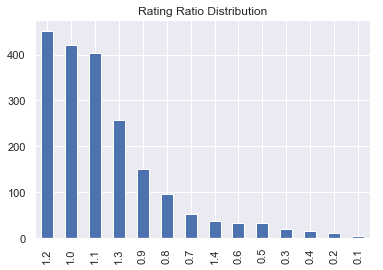

In [69]:
complete_df.rating_ratio.value_counts().plot(kind = 'bar', title='Rating Ratio Distribution')

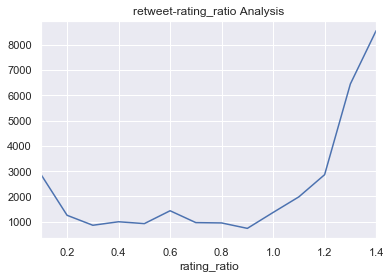

In [70]:
complete_df.groupby('rating_ratio')['retweets'].mean().plot(title='retweet-rating_ratio Analysis',kind='line')

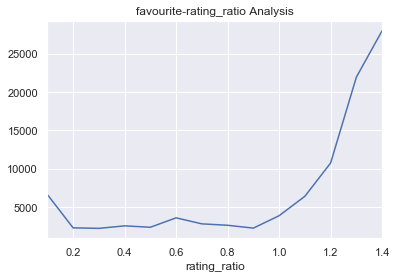

In [71]:
complete_df.groupby('rating_ratio')['favorites'].mean().plot(title='favourite-rating_ratio Analysis',kind='line')

Average rating ration is 1.05 and there is a positive relationship with number of retweet and favorite. Any ration is bigger than 1, the trends will increase exponentially over the number of retweet and favorite

### 2. Dog Breeds Analysis

We will make an analysis based on dog1 since it has the highest posibility value of image prediction

In [72]:
dogbreed = complete_df.groupby(by = 'dog1')[['rating_ratio','retweets' , 'favorites']].sum()
dogbreed.head(3)

,rating_ratio,retweets,favorites
dog1,,,
Afghan hound,2.9,16192,48577
Airedale,11.8,15138,59348
American staffordshire terrier,13.0,20485,70225


In [73]:
#Since there are some none value under dog breed, we should remove 'None' value
dogbreed = dogbreed.drop('None')


In [74]:
#Sorting value based on rating ratio
dogbreed_rating = dogbreed.sort_values(by = 'rating_ratio', ascending = False)['rating_ratio'].head(10)
dogbreed_rating.head()

dog1
Golden retriever      160.0
Labrador retriever    103.1
Pembroke              100.7
Chihuahua              84.6
Pug                    55.3
Name: rating_ratio, dtype: float64

In [75]:
#Sorting value based on retweet count
dogbreed_retweet = dogbreed.sort_values(by = 'retweets', ascending = False)['retweets'].head(10)
dogbreed_retweet.head()

dog1
Golden retriever      459435
Labrador retriever    323035
Pembroke              256195
Chihuahua             207145
Samoyed               159300
Name: retweets, dtype: int64

In [76]:
#Sorting value based on favorite count
dogbreed_favorite = dogbreed.sort_values(by = 'favorites', ascending = False)['favorites'].head(10)
dogbreed_favorite.head()

dog1
Golden retriever      1614398
Labrador retriever    1018660
Pembroke               952708
Chihuahua              660982
Samoyed                492282
Name: favorites, dtype: int64

Text(0.5, 1.0, 'Top Dog breeds based on favorite')

<Figure size 432x288 with 0 Axes>

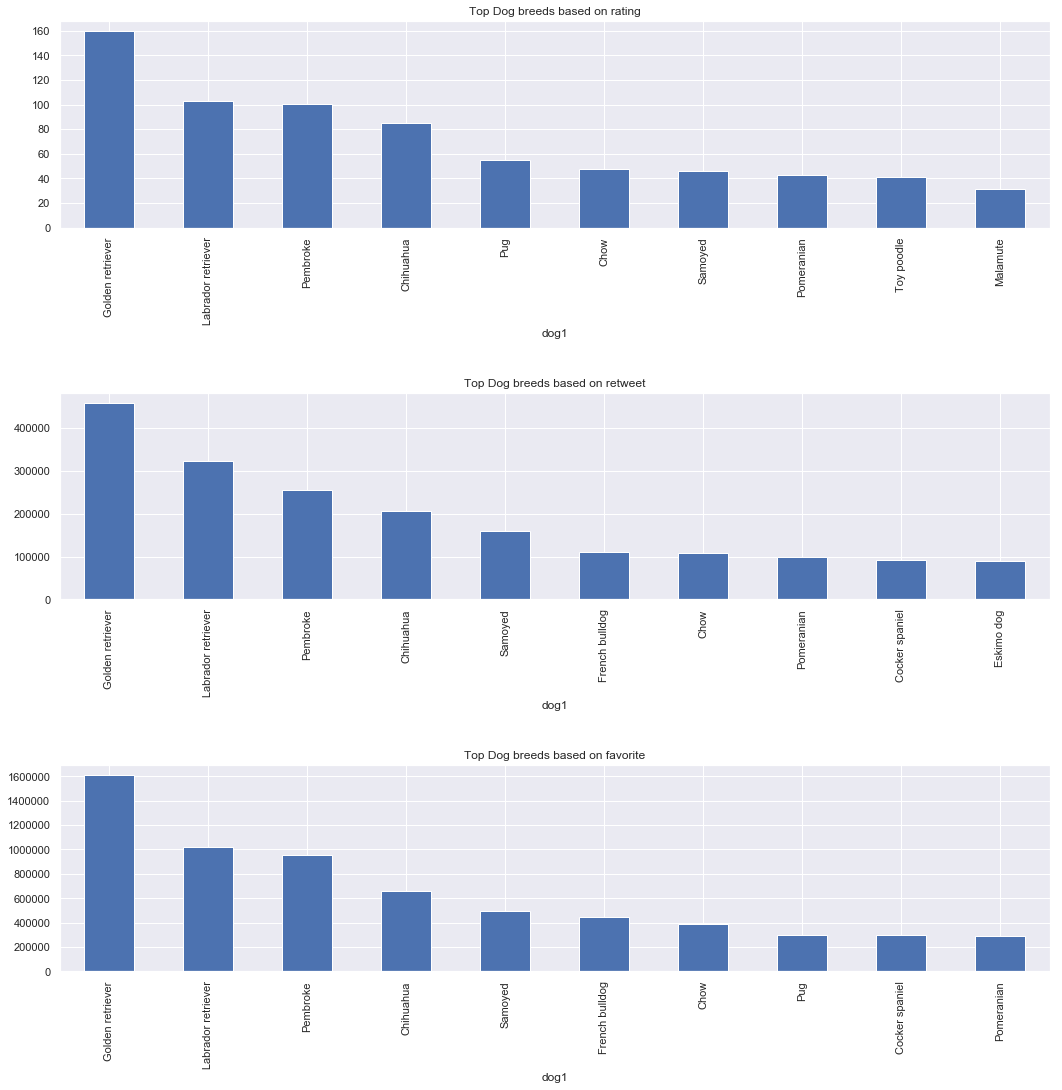

In [77]:
plt.figure()
figure, axes = plt.subplots(3, 1)
figure.set_figheight(12)
figure.set_figwidth(10)
plt.subplots_adjust(left=0.125, bottom = 0.1, top = 1.2, right = 1.5, wspace=0.4, hspace=0.8)

dogbreed_rating.plot(kind='bar' , ax = axes[0]).set_title('Top Dog breeds based on rating')
dogbreed_retweet.plot(kind='bar', ax = axes[1]).set_title('Top Dog breeds based on retweet')
dogbreed_favorite.plot(kind='bar' , ax = axes[2]).set_title('Top Dog breeds based on favorite') 

Based on the above observation, Type of dog breeds that always be in top rating, favorite, and retweet are Golden Retriever, Labrador Retriever, Pembroke, Cihuahua, and followed by Samoyed or Pug (only for rating).

Golden Retriever is the most favourite, rated, and retweet dog breed and it has significant difference with other type of dog breeds, as we can refer Labrador Retriever

### 3. Dog Stage Analysis

count        305
unique         5
top       pupper
freq         203
Name: dog_stage, dtype: object

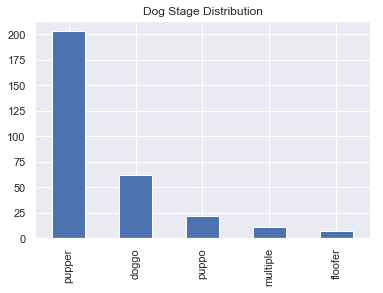

In [78]:
dogstage = complete_df[['tweet_id','rating_ratio','favorites','retweets','dog_stage']]
dogstage['dog_stage'].value_counts().plot(kind='bar', title='Dog Stage Distribution')
dogstage['dog_stage'].describe()

<Figure size 432x288 with 0 Axes>

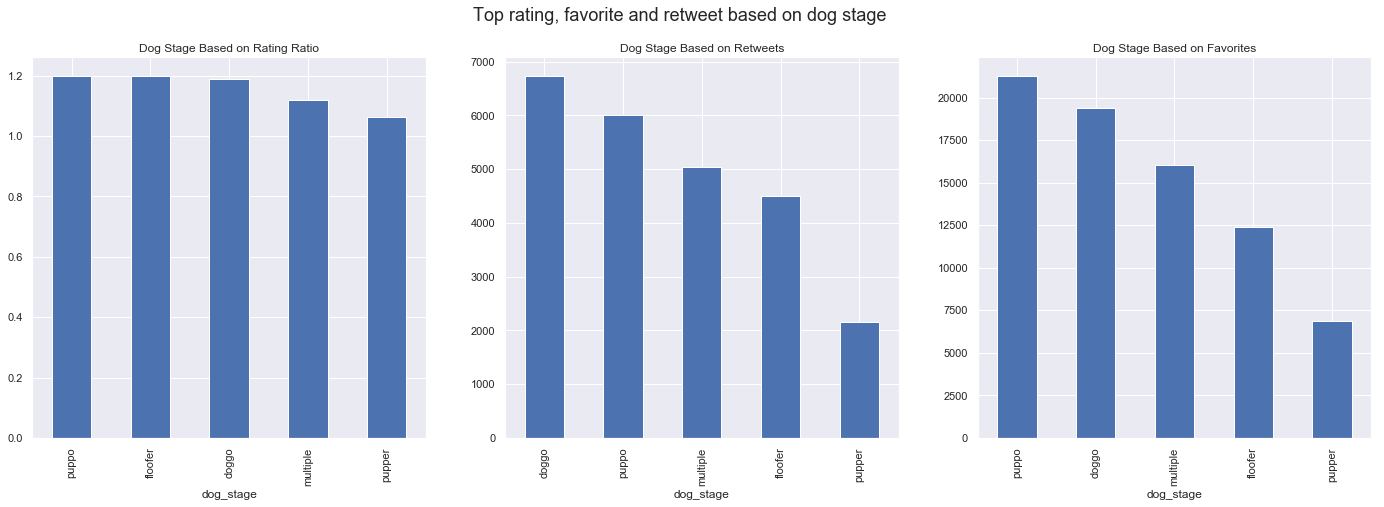

In [79]:
plt.figure()
figure, axes = plt.subplots(1, 3)
figure.set_figheight(7)
figure.set_figwidth(24)
figure.suptitle('Top rating, favorite and retweet based on dog stage', fontsize=18)
dogstage.groupby('dog_stage')['rating_ratio'].mean().sort_values(ascending=False).plot(title='Dog Stage Based on Rating Ratio',kind='bar', ax= axes[0])
dogstage.groupby('dog_stage')['retweets'].mean().sort_values(ascending=False).plot(title='Dog Stage Based on Retweets',kind='bar', ax=axes[1])
dogstage.groupby('dog_stage')['favorites'].mean().sort_values(ascending=False).plot(title='Dog Stage Based on Favorites',kind='bar', ax=axes[2])

- Based on Rating Ratio: Doggo, floofer and puppo are most favorite dog stage
- Based on Retweet:Doggo is the most favorite dog stage
- Based on favorite:puppo is the most favorute dog stage
- Pupper is the least favorite among these three analyses

### 4. Relationship between Time and Favourite and Retweet

In [80]:
time_df = complete_df [['timestamp','retweets','favorites']]
time_df.head()

,timestamp,retweets,favorites
0,2017-08-01 16:23:56+00:00,7951,37173
1,2017-08-01 00:17:27+00:00,5906,31971
2,2017-07-31 00:18:03+00:00,3904,24074
3,2017-07-30 15:58:51+00:00,8106,40486
4,2017-07-29 16:00:24+00:00,8788,38717


Text(0, 0.5, 'Number of Tweets')

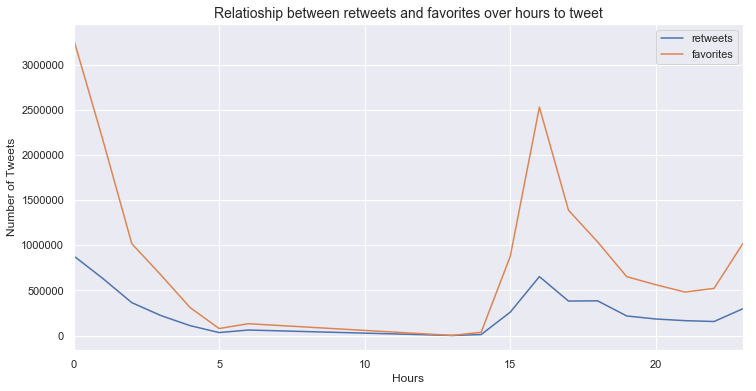

In [81]:
time_df.groupby(by=time_df['timestamp'].dt.hour).sum().plot(kind='line', figsize=(12,6)).set_title('Relationship between time and favourite and retweet') 
plt.title('Relatioship between retweets and favorites over hours to tweet', fontsize = 14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Number of Tweets', fontsize = 12)

Text(0, 0.5, 'Number of Tweets')

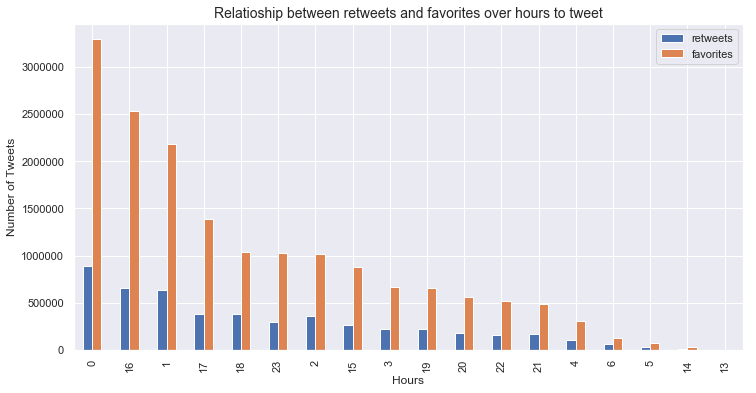

In [82]:
time_df.groupby(by=time_df['timestamp'].dt.hour).sum().sort_values(by=['favorites','retweets'],ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Relatioship between retweets and favorites over hours to tweet', fontsize = 14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Number of Tweets', fontsize = 12)

Based on the observation on above chart, it shows that the optimum time of people engaging in twitter is approximately from 04:00pm - 06:00pm and start to decrease during dinner time (07:00pm - 10:00pm) and it increases significantly to the peak point in the midnight time from 00:00- 01:00am. This would suggest that in order to achieve high retweet and favorite, it's recommended to post the tweet within the above suggested time since there is more people engaging with social media. 